In [17]:
#参考论文：[1] 马鸿耀, 王国胤, 张清华,等. 基于云模型的多粒度彩色图像分割[J]. 计算机工程, 2012, 38(20):184-187.
#          [2] 秦昆, 王佩. 基于云变换的曲线拟合新方法[J]. 计算机工程与应用, 2008, 44(23):56-58.
import matplotlib.pyplot as plt
import numpy as np
import math
import random as rd

In [18]:
 #正向云发生器；二阶正向正态云发生器
def FCG(Ex,En,He,n):
    drops = np.zeros((n,2))
    for i in range(n):
        y_i = rd.gauss(En, He)
        x_i = rd.gauss(Ex,y_i)
        mu_xi = np.exp(-((x_i-Ex)**2/(2*(y_i**2))))
        drops[i,0] = x_i
        drops[i,1] = mu_xi

    return drops

In [19]:
 #计算云中的期望EX,熵EN,超熵HE;
#使用算法BCG1
#X为样本点,逆向云发生器；即：把定量数据转换为定性数据
#把样本数据转换为用数字特征表示的概念数据
def BCG1(x):

    #1.根据Xi计算这组数据的样本均值x_means
    n = len(x)
    x_sum = 0
    for i in range(n):
        x_sum +=x[i]
    x_means = 1/n*x_sum

    #1.1一阶样本中心矩cd1
    cd1 = 0
    for i in range(n):
        cd1 +=abs(x[i]-x_means)
    cd1 = 1/n*cd1

    #1.2样本方差s2;
    s2_ = 0
    for i in range(n):
        s2_ += (x[i] - x_means)**2
    s2 = (1/(n-1))*s2_

    #2.计算期望Ex;
    Ex = x_means
    #3.计算熵En;
    En = np.sqrt(math.pi/2)*cd1
    #4.计算超熵He
    He = np.sqrt(abs(s2-En**2))

    return Ex, En, He

'''
    例：C(25,3,0.1)云粒
        Ex = 25: 年轻人的期望年龄
        En = 3和He = 0.1是对年轻人这一不确定性概念的不确定性度量
    '''

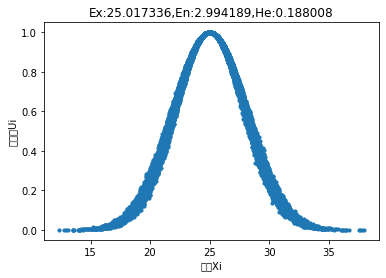

In [20]:
#1.生成云滴,正向操作：把一个25岁的青年认知算出定量值
young = FCG(25,3,0.1,50000)
plt.scatter(young[:,0],young[:,1],s=10)
plt.xlabel("云滴Xi")
plt.ylabel("置信度Ui")
#2.把云滴变为定性概念
plt.title("Ex:%F,En:%F,He:%F"%BCG1(young[:,0]))
plt.show()